In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D

In [2]:
matplotlib.rc("text", usetex=True)
matplotlib.rc("font", family="serif")
matplotlib.style.use("dark_background")

# Activation functions

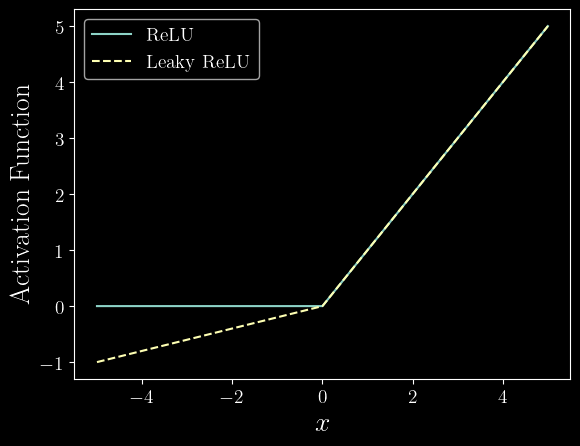

In [3]:
# relu
xvals = np.linspace(-5, 5, num=1000)
relu = np.where(xvals > 0, xvals, 0)

# leaky relu
alpha = 0.2
leaky_relu = np.where(xvals > 0, xvals, alpha * xvals)

fig = plt.figure()
ax = plt.gca()
ax.plot(xvals, relu, label="ReLU")
ax.plot(xvals, leaky_relu, label="Leaky ReLU", linestyle="--")

ax.set_xlabel("$x$", fontsize=20)
ax.set_ylabel("Activation Function", fontsize=20)
ax.tick_params(axis="both", labelsize=14)
ax.legend(loc=0, fontsize=14)

fig.savefig("relu.pdf", bbox_inches="tight", transparent=True)

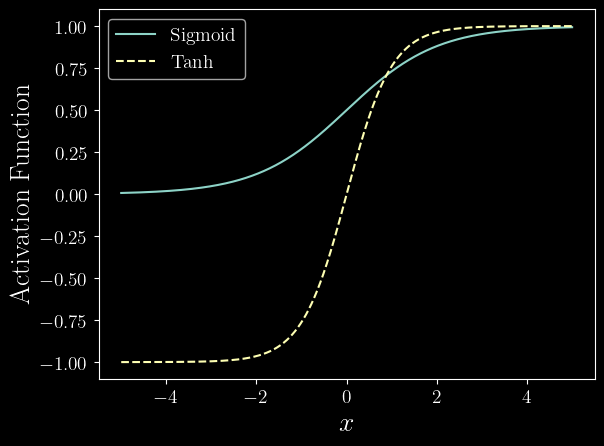

In [4]:
# sigmoid + tanh
sigmoid = 1 / (1 + np.exp(-xvals))
tanh = (np.exp(xvals) - np.exp(-xvals)) / (np.exp(xvals) + np.exp(-xvals))

fig = plt.figure()
ax = plt.gca()
ax.plot(xvals, sigmoid, label="Sigmoid")
ax.plot(xvals, tanh, label="Tanh", linestyle="--")

ax.set_xlabel("$x$", fontsize=20)
ax.set_ylabel("Activation Function", fontsize=20)
ax.tick_params(axis="both", labelsize=14)
ax.legend(loc=0, fontsize=14)

fig.savefig("sigmoid.pdf", bbox_inches="tight", transparent=True)

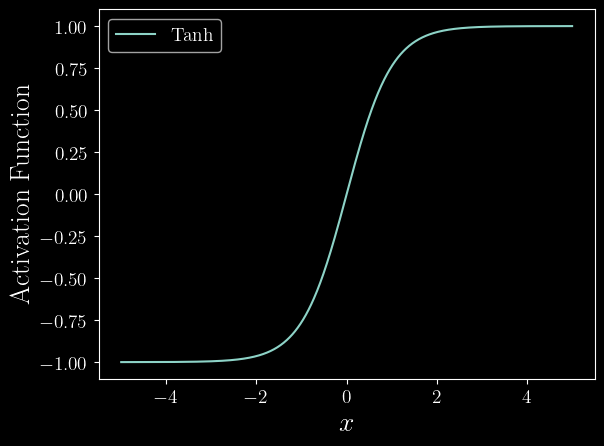

In [5]:
# tanh
tanh = (np.exp(xvals) - np.exp(-xvals)) / (np.exp(xvals) + np.exp(-xvals))

fig = plt.figure()
ax = plt.gca()
ax.plot(xvals, tanh, label="Tanh")

ax.set_xlabel("$x$", fontsize=20)
ax.set_ylabel("Activation Function", fontsize=20)
ax.tick_params(axis="both", labelsize=14)
ax.legend(loc=0, fontsize=14)

fig.savefig("tanh.pdf", bbox_inches="tight", transparent=True)

# Neural Network Example

In [6]:
# download and split data into training and testing sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

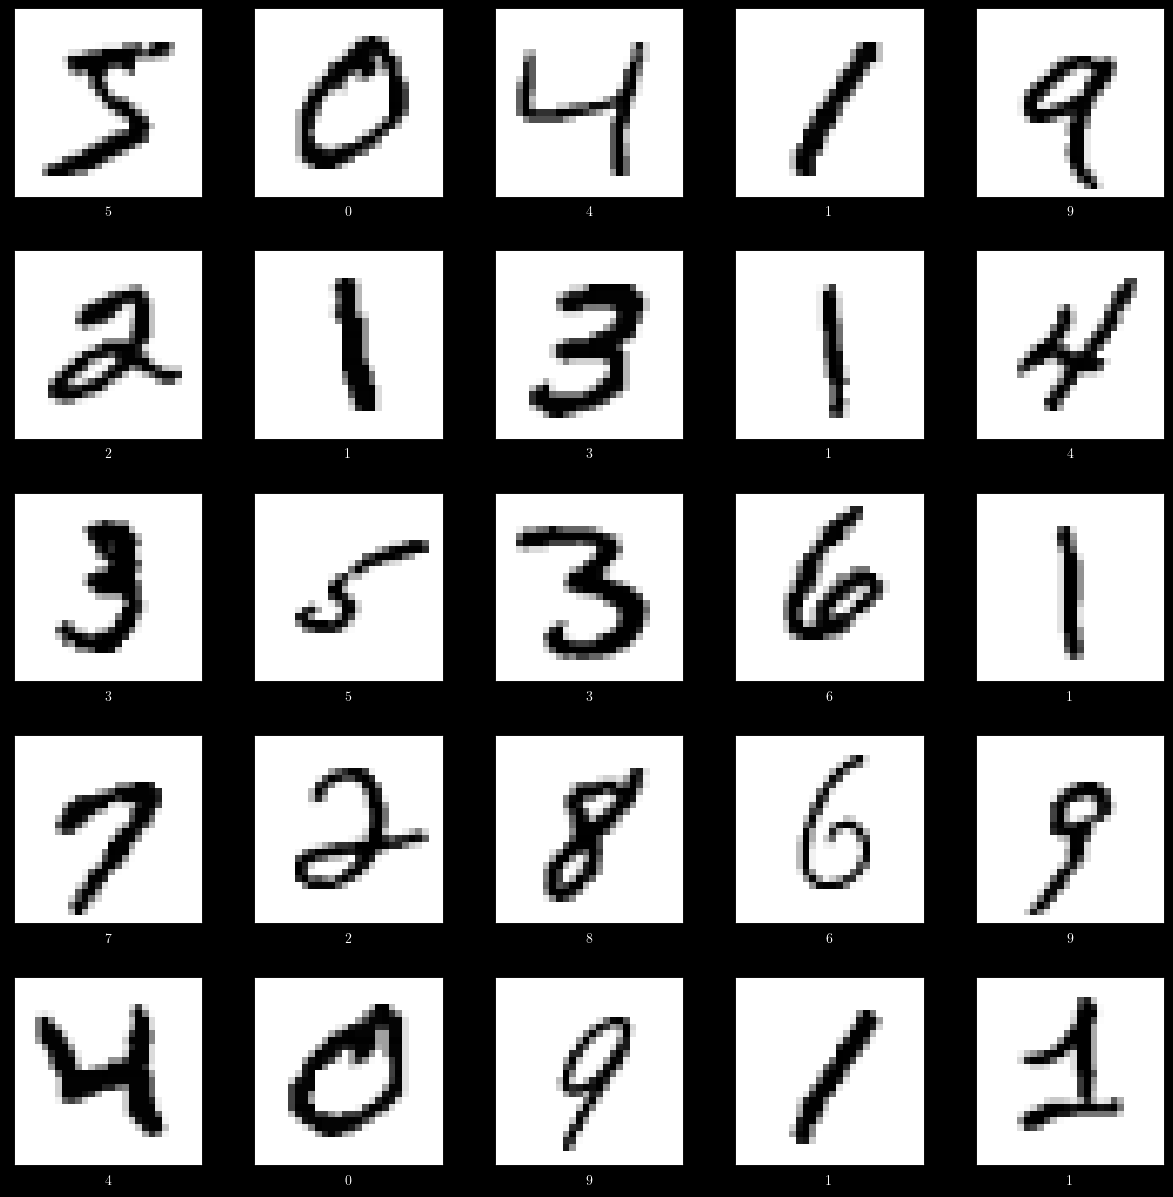

In [7]:
# visualize different input images
plt.figure(figsize=(15, 15))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])

plt.subplots_adjust(hspace=0.3)
plt.show()

In [8]:
# reshape and normalize the data
X_train = X_train.reshape(60000, 28, 28) / 255.0
X_test = X_test.reshape(10000, 28, 28) / 255.0

In [9]:
# print what the labels looks like before
print("before: ", y_train[0])

# one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# show what the output looks like now
print("after: ", y_train[0])

before:  5
after:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [10]:
# create model
model = Sequential()

# add layers
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

# print a summary of the model
print(model.summary())

Metal device set to: Apple M2
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


2022-10-20 14:57:18.240758: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-20 14:57:18.240995: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:
# compile our model
model.compile(optimizer="adam", loss="categorical_crossentropy",
              metrics=["accuracy"])

In [12]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3


2022-10-20 14:57:18.494909: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-20 14:57:18.622219: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1865/1875 [============================>.] - ETA: 0s - loss: 0.2568 - accuracy: 0.9274

2022-10-20 14:57:26.561231: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 9s 5ms/step - loss: 0.2564 - accuracy: 0.9275 - val_loss: 0.1331 - val_accuracy: 0.9592
Epoch 2/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1115 - accuracy: 0.9667 - val_loss: 0.1066 - val_accuracy: 0.9678
Epoch 3/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0767 - accuracy: 0.9767 - val_loss: 0.0855 - val_accuracy: 0.9738


In [13]:
# predict on the first few images of the training dataset
model.predict(X_test[:4])

1/1 [==============================] - 0s 35ms/step


2022-10-20 14:57:45.158062: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


array([[1.60464072e-06, 1.01163886e-08, 2.05309436e-04, 1.89135520e-04,
        8.54340973e-11, 6.10300333e-07, 8.86248019e-11, 9.99600112e-01,
        1.86171530e-06, 1.39969313e-06],
       [1.11190921e-07, 1.05214995e-05, 9.99946237e-01, 1.17341215e-05,
        1.82461633e-11, 1.45254671e-05, 2.14253745e-07, 1.90845700e-10,
        1.66133996e-05, 1.19016283e-10],
       [1.89373566e-06, 9.96301472e-01, 1.02422666e-03, 4.55046793e-05,
        3.19184910e-04, 2.71318768e-05, 2.62743761e-05, 1.64658541e-03,
        5.96889935e-04, 1.09313833e-05],
       [9.98872519e-01, 1.35535160e-07, 7.64553086e-04, 2.28887825e-06,
        3.31545294e-07, 2.42907117e-05, 3.17671256e-05, 2.99692183e-04,
        4.70721133e-08, 4.40749545e-06]], dtype=float32)

In [14]:
# show the actual answers
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

32/32 [==============================] - 0s 2ms/step


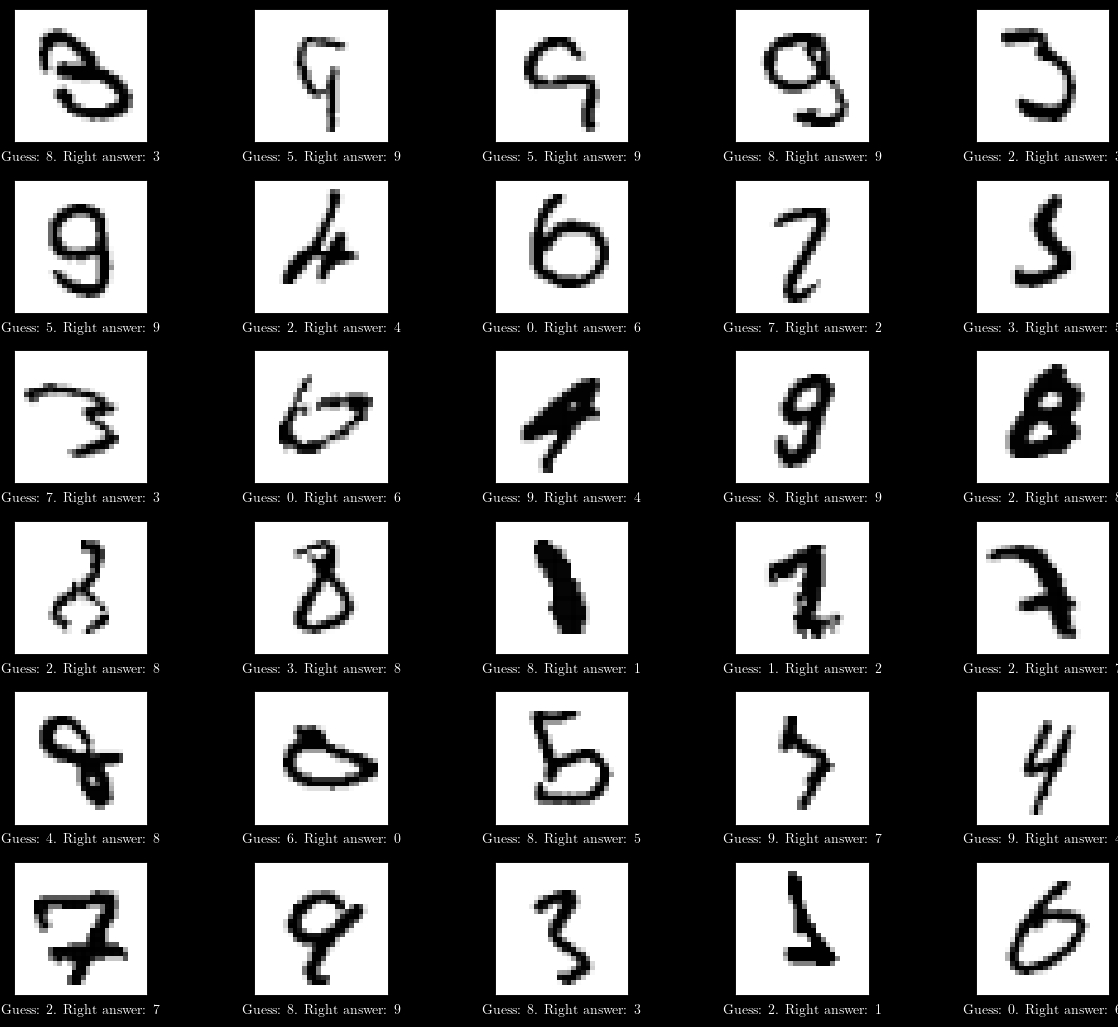

In [15]:
full_preds = model.predict(X_test[:1000])
preds = np.argmax(full_preds, axis=1)
answers = np.argmax(y_test[:1000], axis=1)
wrong_preds = np.nonzero(preds != answers)
nwrong = len(wrong_preds[0])
nrows = nwrong // 5 + 1

# plot the data for these entries
plt.figure(figsize=(15, 15))
for i, idx in enumerate(wrong_preds[0]):
    plt.subplot(nrows, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[idx], cmap=plt.cm.binary)
    plt.xlabel("Guess: {:d}. Right answer: {:d}".format(np.argmax(full_preds[idx]),
                                                        np.argmax(y_test[idx])))

plt.subplots_adjust(hspace=0.3)
plt.show()